In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
# Create a new folder
os.mkdir('/content/gdrive/My Drive/HousePrices')

In [ ]:
!pip install opendatasets
!pip install pandas-profiling
!pip install wandb
!pip install pyarrow
!pip install kneed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 75.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=62656744fb683ca5e4febebc078274c70713eb2189a288685c710ecc214d94d1
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [ ]:
import opendatasets as od
url = "https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques"
data = od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ace991
Your Kaggle Key: ··········


100%|██████████| 199k/199k [00:00<00:00, 40.9MB/s]


Extracting archive ./house-prices-advanced-regression-techniques/house-prices-advanced-regression-techniques.zip to ./house-prices-advanced-regression-techniques


In [ ]:
import shutil
import os
source_folder_path = '/content/house-prices-advanced-regression-techniques'
destination_folder = '/content/gdrive/My Drive/HousePrices/'

shutil.copytree(source_folder_path, os.path.join(destination_folder, os.path.basename(source_folder_path)))

print("Directory copied to Google Drive successfully!")


Directory copied to Google Drive successfully!


In [ ]:
import pandas as pd
import os

# Set display options to show all columns
pd.set_option('display.max_columns', None)

In [ ]:
import wandb
wandb.login()

wandb: Currently logged in as: amubeen457. Use `wandb login --relogin` to force relogin


True

In [ ]:
# Initialize a WandB Run
wandb.init(project="house-prices-wandb",name="Semi-Supervised-ML-5",job_type="Modeling")

# Log the `data` directory as an artifact
artifact = wandb.Artifact('house_price_regression', type='dataset', metadata={"Source": "https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data"},description="Authentic Data")
artifact.add_dir('/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques')
wandb.log_artifact(artifact)

wandb: Adding directory to artifact (/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques)... Done. 0.2s


<Artifact house_price_regression>

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques/train.csv')
df_test =pd.read_csv('/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques/test.csv')
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1264,1265,120,RH,34.0,4060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,TwnhsE,1Story,6,5,1998,1999,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,266,Unf,0,1139,1405,GasA,Ex,Y,SBrkr,1337,0,0,1337,1,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1998.0,Fin,2,511,TA,TA,Y,144,68,0,0,0,0,NaN,NaN,NaN,0,8,2008,COD,Abnorml,181000
1286,1287,20,RL,NaN,9790,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Feedr,Norm,1Fam,1Story,6,5,1963,1963,Hip,CompShg,HdBoard,HdBoard,BrkFace,451.0,TA,TA,CBlock,TA,TA,No,ALQ,569,Rec,81,678,1328,GasA,TA,Y,SBrkr,1328,0,0,1328,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,Unf,2,528,TA,TA,Y,0,26,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,143000
157,158,60,RL,92.0,12003,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,2Story,8,5,2009,2010,Gable,CompShg,VinylSd,VinylSd,BrkFace,84.0,Gd,TA,PConc,Ex,TA,No,Unf,0,Unf,0,774,774,GasA,Ex,Y,SBrkr,774,1194,0,1968,0,0,2,1,4,1,Ex,8,Typ,1,Gd,BuiltIn,2009.0,Fin,3,680,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,5,2010,New,Partial,269500
1146,1147,20,RL,NaN,11200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,6,5,1985,1985,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,85.0,Gd,TA,CBlock,Gd,TA,No,GLQ,1258,Unf,0,40,1298,GasA,TA,Y,SBrkr,1298,0,0,1298,1,0,2,0,3,1,Gd,5,Typ,1,TA,Attchd,1985.0,Unf,2,403,TA,TA,Y,165,26,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,180000
1405,1406,120,RM,44.0,3842,Pave,NaN,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,TwnhsE,1Story,8,5,2004,2005,Hip,CompShg,CemntBd,CmentBd,Stone,174.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1373,Unf,0,221,1594,GasA,Ex,Y,SBrkr,1646,0,0,1646,1,1,2,0,2,1,Gd,5,Typ,1,Gd,Attchd,2004.0,Fin,2,482,TA,TA,Y,128,53,0,0,155,0,NaN,NaN,NaN,0,1,2008,WD,Normal,275000


In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
missing_values_count = df.isnull().sum()
columns_with_missing_values = missing_values_count[missing_values_count > 0]
print(columns_with_missing_values)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


We will look throught the missing data and consider how to deal with the different types.

In [ ]:
column_names = ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
                'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
len(column_names)

19

In [ ]:
df[column_names].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [ ]:
df[column_names].sample(10)

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
886,70.0,NaN,BrkFace,122.0,TA,TA,No,LwQ,Unf,SBrkr,NaN,Attchd,2005.0,Fin,TA,TA,NaN,NaN,NaN
1209,85.0,NaN,Stone,420.0,Ex,TA,Mn,GLQ,Unf,SBrkr,Gd,Attchd,2006.0,RFn,TA,TA,NaN,NaN,NaN
1439,80.0,NaN,BrkFace,96.0,TA,TA,No,GLQ,Rec,SBrkr,TA,Attchd,1979.0,RFn,TA,TA,NaN,NaN,NaN
1393,60.0,Pave,None,0.0,Fa,TA,No,Unf,Unf,SBrkr,TA,Detchd,2003.0,Unf,Gd,TA,NaN,NaN,NaN
553,67.0,NaN,None,0.0,NaN,NaN,NaN,NaN,NaN,SBrkr,NaN,Detchd,2002.0,Fin,TA,TA,NaN,MnPrv,NaN
1104,24.0,NaN,BrkFace,304.0,TA,TA,No,Unf,Unf,SBrkr,NaN,Detchd,1970.0,Unf,TA,TA,NaN,NaN,NaN
1096,60.0,NaN,None,0.0,TA,TA,No,Unf,Unf,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,NaN,NaN,None,0.0,NaN,NaN,NaN,NaN,NaN,SBrkr,NaN,Attchd,1959.0,RFn,TA,TA,NaN,MnPrv,Shed
1447,80.0,NaN,BrkFace,438.0,Gd,TA,No,GLQ,Unf,SBrkr,TA,Attchd,1995.0,RFn,TA,TA,NaN,NaN,NaN
846,75.0,NaN,BrkFace,137.0,Gd,TA,No,ALQ,Unf,SBrkr,TA,Attchd,1993.0,Unf,TA,TA,NaN,NaN,NaN


'LotFrontage': Missing Value

'Alley': NA means No alley access

'MasVnrType': Missing Value - Fill with Median

'MasVnrArea': Missing Value - Fill with Median

'BsmtQual': NA means No basement

'BsmtCond': NA means No basement

'BsmtExposure': NA means No basement

'BsmtFinType1': NA means No basement

'BsmtFinType2': NA means No basement

'Electrical': Missing Value - Fill with Mode

'FireplaceQu': NA means No Fireplace

'GarageType': NA means No Garage

'GarageYrBlt': NA means No Garage

'GarageFinish': NA means No Garage

'GarageQual': NA means No Garage

'GarageCond': NA means No Garage

'PoolQC': NA means No pool

'Fence': NA means No Fence

'MiscFeature': NA means None


In [ ]:
missing = df['LotFrontage'].isnull()
selected_columns = ['LotArea', 'LotFrontage', 'LotConfig', 'LotShape']
subset_df = df.loc[missing, selected_columns]
subset_df.head(15)

,LotArea,LotFrontage,LotConfig,LotShape
7,10382,NaN,Corner,IR1
12,12968,NaN,Inside,IR2
14,10920,NaN,Corner,IR1
16,11241,NaN,CulDSac,IR1
24,8246,NaN,Inside,IR1
31,8544,NaN,CulDSac,IR1
42,9180,NaN,CulDSac,IR1
43,9200,NaN,CulDSac,IR1
50,13869,NaN,Corner,IR2
64,9375,NaN,Inside,Reg


In [ ]:
df.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [ ]:
mode = df['Electrical'].mode()
df['Electrical'] = df['Electrical'].fillna(value=mode[0])

In [ ]:
overall_median = df['LotFrontage'].median()
df['LotFrontage'] = df.groupby(['LotConfig', 'LotShape'])['LotFrontage'].apply(lambda x: x.fillna(x.median() if not pd.isnull(x.median()) else overall_median))

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
<ipython-input-14-b8f368cfc400>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['LotFrontage'] = df.groupby(['LotConfig', 'LotShape'])['LotFrontage'].apply(lambda x: x.fillna(x.median() if not pd.isnull(x.median()) else overall_median))


In [ ]:
missing = df['MasVnrType'].isnull()
subset_df = df.loc[missing]
subset_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,65.0,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,530,20,RL,50.0,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


In [ ]:
mode = df['MasVnrType'].mode()
df['MasVnrType'] = df['MasVnrType'].fillna(value=mode[0])

In [ ]:
median = df['MasVnrArea'].median()
df['MasVnrArea'] = df['MasVnrArea'].fillna(value=median)

In [ ]:
missing_values_count = df_test.isnull().sum()
columns_with_missing_values = missing_values_count[missing_values_count > 0]
print(columns_with_missing_values)

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [ ]:
overall_median = df['LotFrontage'].median()
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(overall_median)
mode = df['MasVnrType'].mode()
df_test['MasVnrType'] = df_test['MasVnrType'].fillna(value=mode[0])
median = df['MasVnrArea'].median()
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(value=median)

In [ ]:
columns_to_fill = [
    'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'SaleType',
    'GarageCars', 'GarageArea', 'KitchenQual', 'Functional', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1'
]

for column in columns_to_fill:
    df_test[column] = df_test[column].fillna(df[column].mode()[0])


Columns below will be encode later not filled or removed because they represent meaning.

In [ ]:
missing_values_count = df.isnull().sum()
columns_with_missing_values = missing_values_count[missing_values_count > 0]
print(columns_with_missing_values)

Alley           1369
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [ ]:
missing_values_count = df_test.isnull().sum()
columns_with_missing_values = missing_values_count[missing_values_count > 0]
print(columns_with_missing_values)

Alley           1352
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
dtype: int64


Dropping the date column and creating a separate binary indicator.

In [ ]:
df['GaragePresence'] = df['GarageYrBlt'].notnull().astype(int)
df = df.drop('GarageYrBlt', axis=1)
df_test['GaragePresence'] = df_test['GarageYrBlt'].notnull().astype(int)
df_test = df_test.drop('GarageYrBlt', axis=1)

In [ ]:
df_all = pd.concat([df,df_test],axis=0)

In [ ]:
len(df_all)

2919

In [ ]:
missing_values_count = df_all.isnull().sum()
columns_with_missing_values = missing_values_count[missing_values_count > 0]
print(columns_with_missing_values)

Alley           2721
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SalePrice       1459
dtype: int64


EDA

In [ ]:
"""from pandas_profiling import ProfileReport
profile = ProfileReport(df,explorative=True)
profile.to_file('edafinal.html')"""

"from pandas_profiling import ProfileReport\nprofile = ProfileReport(df,explorative=True)\nprofile.to_file('edafinal.html')"

In [ ]:
"""import os
import shutil

source_file_path = '/content/edafinal.html'
destination_folder = '/content/gdrive/My Drive/HousePrices'

destination_file_path = os.path.join(destination_folder, os.path.basename(source_file_path))
shutil.move(source_file_path, destination_file_path)

print("File moved to Google Drive successfully!")"""

'import os\nimport shutil\n\nsource_file_path = \'/content/edafinal.html\'\ndestination_folder = \'/content/gdrive/My Drive/HousePrices\'\n\ndestination_file_path = os.path.join(destination_folder, os.path.basename(source_file_path))\nshutil.move(source_file_path, destination_file_path)\n\nprint("File moved to Google Drive successfully!")'

In [ ]:
import plotly.express as px

# Group the data and aggregate the count
grouped_data = df.groupby('YearBuilt').agg({'Id': 'count'}).reset_index()

# Create the Plotly figure
fig = px.bar(grouped_data, x='YearBuilt', y='Id', labels={'YearBuilt': 'Year Built', 'Id': 'Count'})

# Customize the figure (optional)
fig.update_layout(title='Count of Properties by Year Built')

# Show the figure
fig.show()


In [ ]:
# Define the titles for each MSSubClass code
class_titles = {
    20: '1-STORY 1946 & NEWER ALL STYLES',
    30: '1-STORY 1945 & OLDER',
    40: '1-STORY W/FINISHED ATTIC ALL AGES',
    45: '1-1/2 STORY - UNFINISHED ALL AGES',
    50: '1-1/2 STORY FINISHED ALL AGES',
    60: '2-STORY 1946 & NEWER',
    70: '2-STORY 1945 & OLDER',
    75: '2-1/2 STORY ALL AGES',
    80: 'SPLIT OR MULTI-LEVEL',
    85: 'SPLIT FOYER',
    90: 'DUPLEX - ALL STYLES AND AGES',
    120: '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
    150: '1-1/2 STORY PUD - ALL AGES',
    160: '2-STORY PUD - 1946 & NEWER',
    180: 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
    190: '2 FAMILY CONVERSION - ALL STYLES AND AGES'
}

# Group the data and aggregate the count
grouped_data = df.groupby('MSSubClass').agg({'Id': 'count'}).reset_index()

# Map the MSSubClass codes to their corresponding titles
grouped_data['MSSubClass'] = grouped_data['MSSubClass'].map(class_titles)

# Create the Plotly Treemap
fig = px.treemap(grouped_data, path=['MSSubClass'], values='Id', labels={'MSSubClass': 'Dwelling Type', 'Id': 'Count'})

# Customize the figure (optional)
fig.update_layout(title='Count of Dwellings by Dwelling Type')

# Show the figure
fig.show()


The diagram below was made on tableau and embedded here.It shows the houses from the different neighborhoods.

In [ ]:
%%html
<div class='tableauPlaceholder' id='viz1689212320769' style='position: relative'><noscript><a href='#'><img alt='Sheet 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book1_16892122191350&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Book1_16892122191350&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book1_16892122191350&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1689212320769');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [ ]:
# Calculate the distribution of properties based on MSZoning
zoning_distribution = df['MSZoning'].value_counts()

# Create the pie chart
fig = px.pie(zoning_distribution, values=zoning_distribution.values, names=zoning_distribution.index,
             title='Distribution of Properties by Zoning Classification')

# Show the chart
fig.show()

Encoding columns with NA values.Scaling.

In [ ]:
columns_to_encode = df.select_dtypes(exclude=['number']).columns.tolist()
columns_to_scale = df.select_dtypes(include=['number']).columns.tolist()

In [ ]:
columns_to_add = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold', 'GaragePresence']
columns_to_encode = columns_to_encode+columns_to_add
print(columns_to_encode)


['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold', 'GaragePresence']


In [ ]:
print(len(columns_to_encode))

60


In [ ]:
columns_to_remove = ['SalePrice','Id','MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold', 'GaragePresence']

result = [column for column in columns_to_scale if column not in columns_to_remove]
columns_to_scale = result
print(len(columns_to_scale))
print(columns_to_scale)


19
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pickle

label_encoder = LabelEncoder()

for column in columns_to_encode:
    df_all[column] = label_encoder.fit_transform(df_all[column].astype(str))
    with open(f'/content/gdrive/My Drive/HousePrices/label_{column}.pkl', 'wb') as file:
        pickle.dump(label_encoder, file)
"""
    # Save the label encoder as a Weights & Biases artifact
    artifact = wandb.Artifact(f"label_encoder_{column}", type="label_encoder")
    artifact.add_file(f'/content/gdrive/My Drive/HousePrices/label_{column}.pkl')
    wandb.log_artifact(artifact)
"""

'\n    # Save the label encoder as a Weights & Biases artifact\n    artifact = wandb.Artifact(f"label_encoder_{column}", type="label_encoder")\n    artifact.add_file(f\'/content/gdrive/My Drive/HousePrices/label_{column}.pkl\')\n    wandb.log_artifact(artifact)\n'

In [ ]:
print(len(df))
print(len(df_test))

1460
1459


In [ ]:
df_all.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GaragePresence
0,1,10,3,65.0,8450,1,2,3,3,0,4,0,5,2,2,0,5,7,4,110,53,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706.0,5,0.0,150.0,856.0,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,12,6,0,5,1,1,2,548.0,4,4,2,0,61,0,0,0,0,3,4,4,0,4,2,8,4,208500.0,1
1,2,5,3,80.0,9600,1,2,3,3,0,2,0,24,1,2,0,2,6,7,83,26,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978.0,5,0.0,284.0,1262.0,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,10,6,1,4,1,1,2,460.0,4,4,2,298,0,0,0,0,0,3,4,4,0,7,1,8,4,181500.0,1
2,3,10,3,68.0,11250,1,2,0,3,0,4,0,5,2,2,0,5,7,4,108,52,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486.0,5,0.0,434.0,920.0,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,10,6,1,4,1,1,2,608.0,4,4,2,0,42,0,0,0,0,3,4,4,0,11,2,8,4,223500.0,1
3,4,11,3,60.0,9550,1,2,0,3,0,0,0,6,2,2,0,5,7,4,25,20,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216.0,5,0.0,540.0,756.0,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,11,6,1,2,5,2,3,642.0,4,4,2,0,35,272,0,0,0,3,4,4,0,4,0,8,0,140000.0,1
4,5,10,3,84.0,14260,1,2,0,3,0,2,0,15,2,2,0,5,8,4,107,50,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655.0,5,0.0,490.0,1145.0,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,13,6,1,4,1,1,3,836.0,4,4,2,192,84,0,0,0,0,3,4,4,0,3,2,8,4,250000.0,1


In [ ]:
df = df_all[:1460]
df_test = df_all[1460:]

In [ ]:
print(len(df))
print(len(df_test))

1460
1459


In [ ]:
with open(f'/content/gdrive/My Drive/HousePrices/df.pkl', 'wb') as file:
        pickle.dump(df, file)
with open(f'/content/gdrive/My Drive/HousePrices/df_test.pkl', 'wb') as file:
        pickle.dump(df_test, file)

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target variable (y)
X = df.drop(columns=['SalePrice','Id'])
y = df['SalePrice']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [ ]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GaragePresence
254,4,3,71.0,11553,1,2,0,3,0,4,0,19,2,2,0,2,5,4,69,18,3,1,9,10,1,188.0,3,4,1,3,3,3,1,673,5,0,378,1051,1,4,1,4,1159,0,0,1159,0,0,1,1,3,1,3,9,6,1,1,1,2,1,336,4,4,2,466,0,0,0,0,0,3,4,4,0,9,0,8,4,1
1066,4,3,60.0,8072,1,2,3,3,0,4,0,5,2,2,0,2,5,4,95,45,1,1,12,13,2,0.0,3,2,2,2,1,3,0,746,5,0,244,990,1,0,1,4,990,0,0,990,1,0,1,0,3,1,3,7,6,0,5,5,2,2,480,4,4,2,0,64,0,0,0,0,3,4,4,0,7,3,8,4,1
638,10,3,144.0,21384,1,2,3,3,0,4,0,3,2,2,0,5,5,5,27,54,1,1,13,14,2,0.0,3,4,1,3,3,1,2,1309,5,0,15,1324,1,0,1,4,1072,504,0,1576,2,0,1,1,3,1,2,8,6,1,4,1,1,2,528,4,4,2,0,312,0,0,0,0,3,4,4,0,7,3,8,4,1
799,8,3,65.0,13650,1,2,3,3,0,4,0,19,2,2,0,0,5,4,59,8,1,1,8,8,2,0.0,2,2,1,3,3,3,0,57,1,441,554,1052,1,0,1,4,1252,668,0,1920,1,0,2,0,4,1,2,10,6,1,2,1,2,2,451,4,4,2,0,0,0,0,0,0,3,4,4,0,9,0,8,4,1
380,4,3,71.0,9187,1,2,3,0,0,0,0,11,2,2,0,2,6,4,84,33,1,1,12,13,2,0.0,3,2,2,3,3,3,0,336,5,0,748,1084,1,4,1,4,1080,0,0,1080,0,0,1,1,3,1,3,7,6,0,5,1,2,2,484,4,4,2,120,0,158,0,0,0,3,4,4,0,8,1,8,4,1


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data (X_train) and transform X_train
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

# Transform the test data (X_test) using the same scaler fitted on X_train
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])


In [ ]:
#code for scaler to save as an artifact.

In [ ]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GaragePresence
254,4,3,0.019959,0.100394,1,2,0,3,0,4,0,19,2,2,0,2,5,4,69,18,3,1,9,10,1,0.431729,3,4,1,3,3,3,1,0.483406,5,-0.288860,-0.433361,-0.024177,1,4,1,4,-0.000504,-0.808403,-0.112656,-0.680051,0,0,1,1,3,1,3,9,6,1,1,1,2,1,-0.630092,4,4,2,2.953220,-0.706104,-0.377398,-0.104409,-0.282523,-0.076845,3,4,4,-0.091362,9,0,8,4,1
1066,4,3,-0.444596,-0.249402,1,2,3,3,0,4,0,5,2,2,0,2,5,4,95,45,1,1,12,13,2,-0.567078,3,2,2,2,1,3,0,0.640156,5,-0.288860,-0.741418,-0.161631,1,0,1,4,-0.429088,-0.808403,-0.112656,-0.997416,1,0,1,0,3,1,3,7,6,0,5,5,2,2,0.036984,4,4,2,-0.741898,0.278648,-0.377398,-0.104409,-0.282523,-0.076845,3,4,4,-0.091362,7,3,8,4,1
638,10,3,3.102919,1.088285,1,2,3,3,0,4,0,3,2,2,0,5,5,5,27,54,1,1,13,14,2,-0.567078,3,4,1,3,3,1,2,1.849064,5,-0.288860,-1.267875,0.590984,1,0,1,4,-0.221136,0.333496,-0.112656,0.103036,2,0,1,1,3,1,2,8,6,1,4,1,1,2,0.259343,4,4,2,-0.741898,4.094560,-0.377398,-0.104409,-0.282523,-0.076845,3,4,4,-0.091362,7,3,8,4,1
799,8,3,-0.233435,0.311116,1,2,3,3,0,4,0,19,2,2,0,0,5,4,59,8,1,1,8,8,2,-0.567078,2,2,1,3,3,3,0,-0.839307,1,2.401413,-0.028749,-0.021924,1,0,1,4,0.235345,0.705067,-0.112656,0.749035,1,0,2,0,4,1,2,10,6,1,2,1,2,2,-0.097357,4,4,2,-0.741898,-0.706104,-0.377398,-0.104409,-0.282523,-0.076845,3,4,4,-0.091362,9,0,8,4,1
380,4,3,0.019959,-0.137359,1,2,3,0,0,0,0,11,2,2,0,2,6,4,84,33,1,1,12,13,2,-0.567078,3,2,2,3,3,3,0,-0.240221,5,-0.288860,0.417245,0.050183,1,4,1,4,-0.200848,-0.808403,-0.112656,-0.828405,0,0,1,1,3,1,3,7,6,0,5,1,2,2,0.055514,4,4,2,0.209634,-0.706104,2.144929,-0.104409,-0.282523,-0.076845,3,4,4,-0.091362,8,1,8,4,1


In [ ]:
with open('/content/gdrive/My Drive/HousePrices/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Save the scaler as a Weights & Biases artifact
artifact = wandb.Artifact("scaler", type="scaler")
artifact.add_file('/content/gdrive/My Drive/HousePrices/scaler.pkl')
wandb.log_artifact(artifact)

In [ ]:
def log_data(X_train, X_test, y_train, y_test):
    # Log the training and test data
    training_features = wandb.Artifact(name="house_price_regression",
                               type="dataset",
                               description="Training features split into train and test")
    X_train.to_csv("/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques/X_train.csv", index=False)
    X_test.to_csv("/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques/X_test.csv", index=False)
    y_train.to_csv("/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques/y_train.csv", index=False)
    y_test.to_csv("/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques/y_test.csv", index=False)
    training_features.add_dir('/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques')
    wandb.log_artifact(training_features)


In [ ]:
log_data(X_train, X_test, y_train, y_test)

wandb: Adding directory to artifact (/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques)... Done. 0.1s


# Clustering

{2: 0.46612978804358524, 3: 0.4012765454658146, 4: 0.44870001126402215, 5: 0.4391775400672531, 6: 0.4106443087379186, 7: 0.3038520086258473, 8: 0.28516686516378303, 9: 0.25797302104788916, 10: 0.24297817682540046}


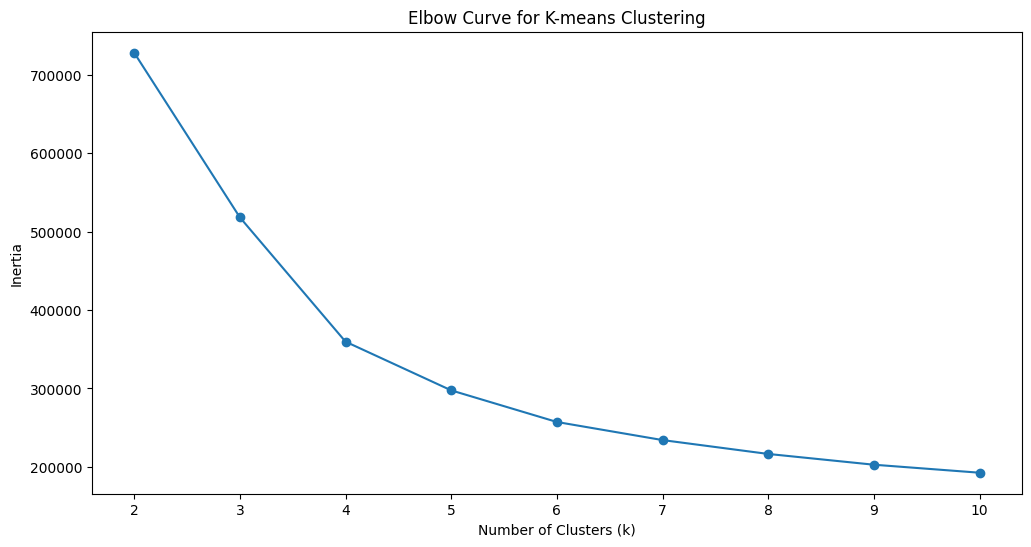

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia_values = []
sil_score = {}
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans.fit(X_train)
    inertia_values.append(kmeans.inertia_)
    y_preds=kmeans.predict(X_train)
    ss = silhouette_score(X_train,y_preds)
    sil_score[k]=ss

# Plot the elbow curve
print(sil_score)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-means Clustering')
plt.show()


In [ ]:
wandb.log({"ElbowPlot": fig})

In [ ]:
from kneed import KneeLocator
kneedle = KneeLocator(range(2, 11),inertia_values, curve="convex", direction="decreasing")

print(round(kneedle.knee, 3))

print(round(kneedle.elbow, 3))


4
4


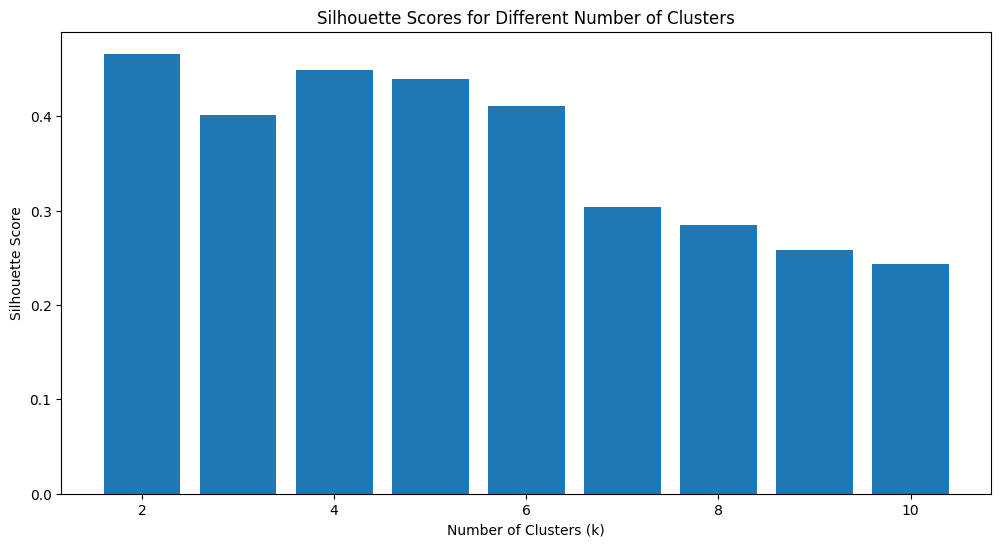

In [ ]:
k_values = list(sil_score.keys())
silhouette_scores = list(sil_score.values())

# Plot the silhouette scores as a bar plot
fig = plt.figure(figsize=(12, 6))
plt.bar(k_values, silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.show()

In [ ]:
wandb.log({"SSplot": fig})

In [ ]:
from sklearn.cluster import KMeans

model_params = {"n_clusters": 4,"n_init":10}
wandb.config = model_params

# Initialize the KMeans model with the desired number of clusters

kmeans = KMeans(**model_params)

# Fit the model to your data
y_preds = kmeans.fit_predict(X_train)
y_preds_test = kmeans.predict(X_test)

In [ ]:
wandb.log({
    "Silhouette Score": silhouette_score(X_train,y_preds)
})

In [ ]:
X_train['cluster'] = y_preds
X_test['cluster'] = y_preds_test

In [ ]:
# Save your model
with open('/content/gdrive/My Drive/HousePrices/KMeans.pkl', 'wb') as file:
    pickle.dump(kmeans, file)
# Log your model as a versioned file to Weights & Biases Artifact
artifact = wandb.Artifact("HousePrice-Clustering-model", type="model")
artifact.add_file("/content/gdrive/My Drive/HousePrices/KMeans.pkl")
wandb.log_artifact(artifact)

<Artifact HousePrice-Clustering-model>

In [ ]:
# Getting the unique clusters from our dataset
X_train['cluster'].unique()

array([0, 1, 3, 2], dtype=int32)

In [ ]:
cluster_data = pd.concat([X_train, y_train], axis=1)
cluster_data_test = pd.concat([X_test, y_test], axis=1)

In [ ]:
cluster_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GaragePresence,cluster,SalePrice
254,4,3,0.019959,0.100394,1,2,0,3,0,4,0,19,2,2,0,2,5,4,69,18,3,1,9,10,1,0.431729,3,4,1,3,3,3,1,0.483406,5,-0.288860,-0.433361,-0.024177,1,4,1,4,-0.000504,-0.808403,-0.112656,-0.680051,0,0,1,1,3,1,3,9,6,1,1,1,2,1,-0.630092,4,4,2,2.953220,-0.706104,-0.377398,-0.104409,-0.282523,-0.076845,3,4,4,-0.091362,9,0,8,4,1,0,158000
1066,4,3,-0.444596,-0.249402,1,2,3,3,0,4,0,5,2,2,0,2,5,4,95,45,1,1,12,13,2,-0.567078,3,2,2,2,1,3,0,0.640156,5,-0.288860,-0.741418,-0.161631,1,0,1,4,-0.429088,-0.808403,-0.112656,-0.997416,1,0,1,0,3,1,3,7,6,0,5,5,2,2,0.036984,4,4,2,-0.741898,0.278648,-0.377398,-0.104409,-0.282523,-0.076845,3,4,4,-0.091362,7,3,8,4,1,1,138000
638,10,3,3.102919,1.088285,1,2,3,3,0,4,0,3,2,2,0,5,5,5,27,54,1,1,13,14,2,-0.567078,3,4,1,3,3,1,2,1.849064,5,-0.288860,-1.267875,0.590984,1,0,1,4,-0.221136,0.333496,-0.112656,0.103036,2,0,1,1,3,1,2,8,6,1,4,1,1,2,0.259343,4,4,2,-0.741898,4.094560,-0.377398,-0.104409,-0.282523,-0.076845,3,4,4,-0.091362,7,3,8,4,1,3,223500
799,8,3,-0.233435,0.311116,1,2,3,3,0,4,0,19,2,2,0,0,5,4,59,8,1,1,8,8,2,-0.567078,2,2,1,3,3,3,0,-0.839307,1,2.401413,-0.028749,-0.021924,1,0,1,4,0.235345,0.705067,-0.112656,0.749035,1,0,2,0,4,1,2,10,6,1,2,1,2,2,-0.097357,4,4,2,-0.741898,-0.706104,-0.377398,-0.104409,-0.282523,-0.076845,3,4,4,-0.091362,9,0,8,4,1,0,172500
380,4,3,0.019959,-0.137359,1,2,3,0,0,0,0,11,2,2,0,2,6,4,84,33,1,1,12,13,2,-0.567078,3,2,2,3,3,3,0,-0.240221,5,-0.288860,0.417245,0.050183,1,4,1,4,-0.200848,-0.808403,-0.112656,-0.828405,0,0,1,1,3,1,3,7,6,0,5,1,2,2,0.055514,4,4,2,0.209634,-0.706104,2.144929,-0.104409,-0.282523,-0.076845,3,4,4,-0.091362,8,1,8,4,1,0,134000


Separating Clusters

In [ ]:
cluster_data_0=cluster_data[cluster_data['cluster']==0]
cluster_data_1=cluster_data[cluster_data['cluster']==1]
cluster_data_2=cluster_data[cluster_data['cluster']==2]
cluster_data_3=cluster_data[cluster_data['cluster']==3]
cluster_data_0_test=cluster_data_test[cluster_data_test['cluster']==0]
cluster_data_1_test=cluster_data_test[cluster_data_test['cluster']==1]
cluster_data_2_test=cluster_data_test[cluster_data_test['cluster']==2]
cluster_data_3_test=cluster_data_test[cluster_data_test['cluster']==3]

In [ ]:
cluster_data_0_y = cluster_data_0['SalePrice']
cluster_data_1_y = cluster_data_1['SalePrice']
cluster_data_2_y = cluster_data_2['SalePrice']
cluster_data_3_y = cluster_data_3['SalePrice']
cluster_data_0_test_y = cluster_data_0_test['SalePrice']
cluster_data_1_test_y = cluster_data_1_test['SalePrice']
cluster_data_2_test_y = cluster_data_2_test['SalePrice']
cluster_data_3_test_y = cluster_data_3_test['SalePrice']

In [ ]:
cluster_data_0=cluster_data_0.drop(columns=['SalePrice','cluster'])
cluster_data_1=cluster_data_1.drop(columns=['SalePrice','cluster'])
cluster_data_2=cluster_data_2.drop(columns=['SalePrice','cluster'])
cluster_data_3=cluster_data_3.drop(columns=['SalePrice','cluster'])
cluster_data_0_test=cluster_data_0_test.drop(columns=['SalePrice','cluster'])
cluster_data_1_test=cluster_data_1_test.drop(columns=['SalePrice','cluster'])
cluster_data_2_test=cluster_data_2_test.drop(columns=['SalePrice','cluster'])
cluster_data_3_test=cluster_data_3_test.drop(columns=['SalePrice','cluster'])

In [ ]:
cluster_data_0.to_csv("/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques/cluster_data_0.csv", index=False)
cluster_data_0_test.to_csv("/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques/cluster_data_0_test.csv", index=False)
cluster_data_0_y.to_csv("/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques/cluster_data_0_y.csv", index=False)
cluster_data_0_test_y.to_csv("/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques/cluster_data_0_test_y.csv", index=False)
cluster_data_1.to_csv("/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques/cluster_data_1.csv", index=False)
cluster_data_1_test.to_csv("/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques/cluster_data_1_test.csv", index=False)
cluster_data_1_y.to_csv("/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques/cluster_data_1_y.csv", index=False)
cluster_data_1_test_y.to_csv("/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques/cluster_data_1_test_y.csv", index=False)
cluster_data_2.to_csv("/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques/cluster_data_2.csv", index=False)
cluster_data_2_test.to_csv("/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques/cluster_data_2_test.csv", index=False)
cluster_data_2_y.to_csv("/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques/cluster_data_2_y.csv", index=False)
cluster_data_2_test_y.to_csv("/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques/cluster_data_2_test_y.csv", index=False)
cluster_data_3.to_csv("/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques/cluster_data_3.csv", index=False)
cluster_data_3_test.to_csv("/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques/cluster_data_3_test.csv", index=False)
cluster_data_3_y.to_csv("/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques/cluster_data_3_y.csv", index=False)
cluster_data_3_test_y.to_csv("/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques/cluster_data_3_test_y.csv", index=False)

In [ ]:
artifact = wandb.Artifact(name="house-price_regression",
                               type="dataset",
                               description="Training features clustered and split into train and test.")
artifact.add_dir('/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques')
wandb.log_artifact(artifact)

wandb: Adding directory to artifact (/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques)... Done. 0.1s


<Artifact house-price_regression>

# Model

In [ ]:
zero = [cluster_data_0,cluster_data_0_test,cluster_data_0_y,cluster_data_0_test_y]
one = [cluster_data_1,cluster_data_1_test,cluster_data_1_y,cluster_data_1_test_y]
two = [cluster_data_2,cluster_data_2_test,cluster_data_2_y,cluster_data_2_test_y]
three = [cluster_data_3,cluster_data_3_test,cluster_data_3_y,cluster_data_3_test_y]

In [ ]:
cluster_list = [zero,one,two,three]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from math import sqrt

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_coefficients(X_train, model,i):
    fig = plt.figure(figsize=(12, 6))
    sns.barplot(x=X_train.columns, y=model.coef_)
    plt.xticks(rotation=90)
    plt.title(f"{model.__class__.__name__}_{i}")
    plt.tight_layout()
    plt.show()

We can feature engineer clusters data by dropping less important columns for different cluster.We will start after concatenation then apply the ridge model and then finally add code to drop columns on basis of threshold and save these into different clusters.

For Cluster: 0


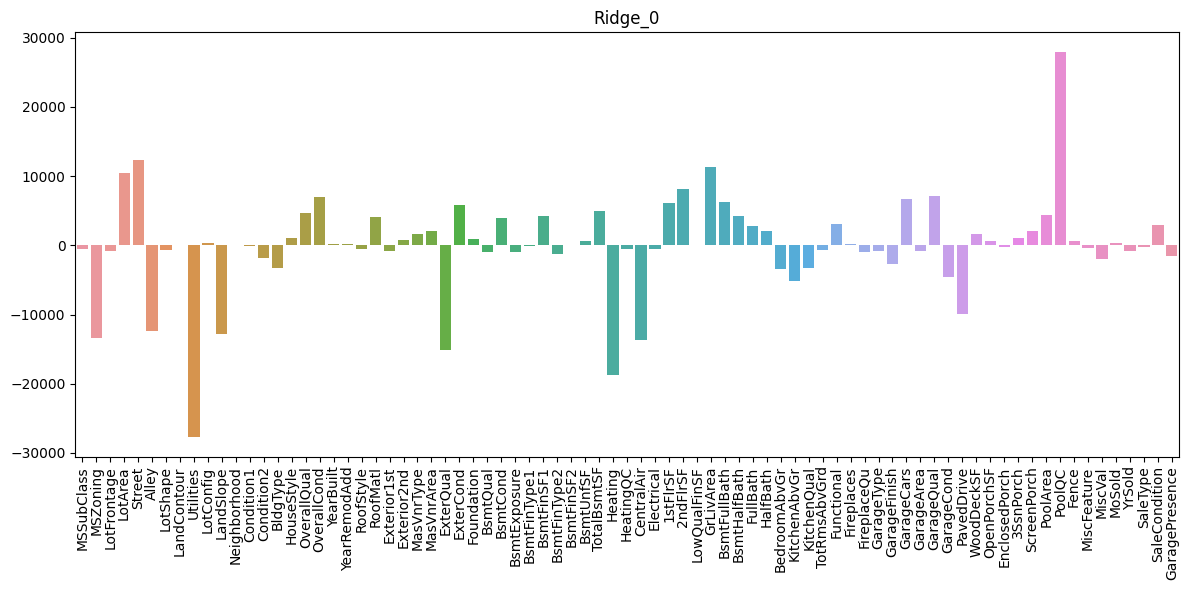

For Cluster: 1


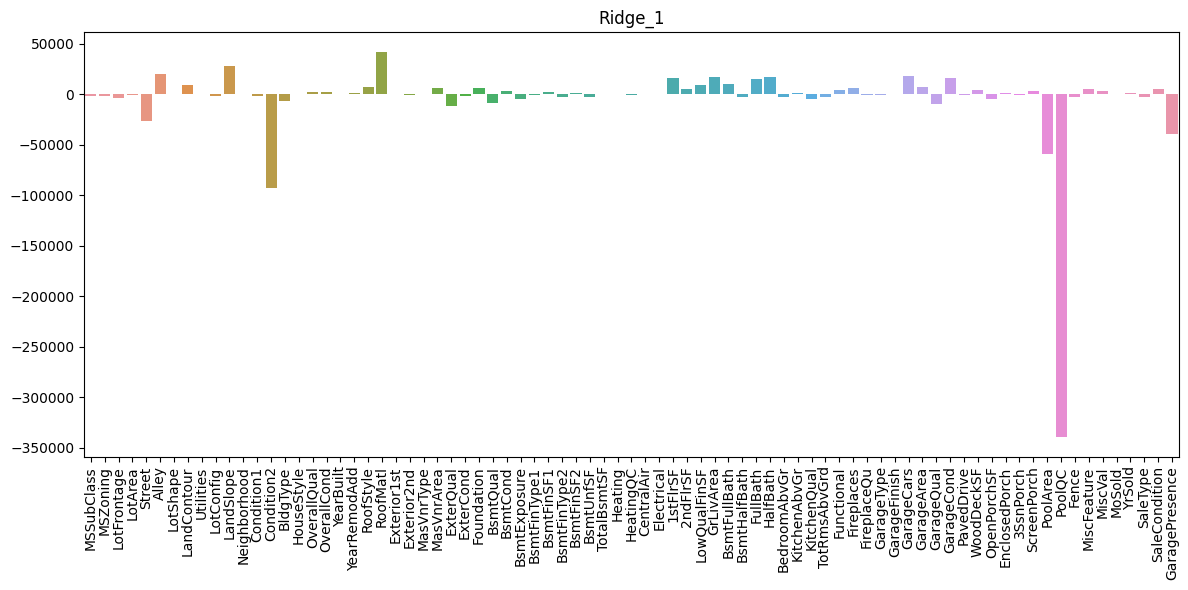

For Cluster: 2


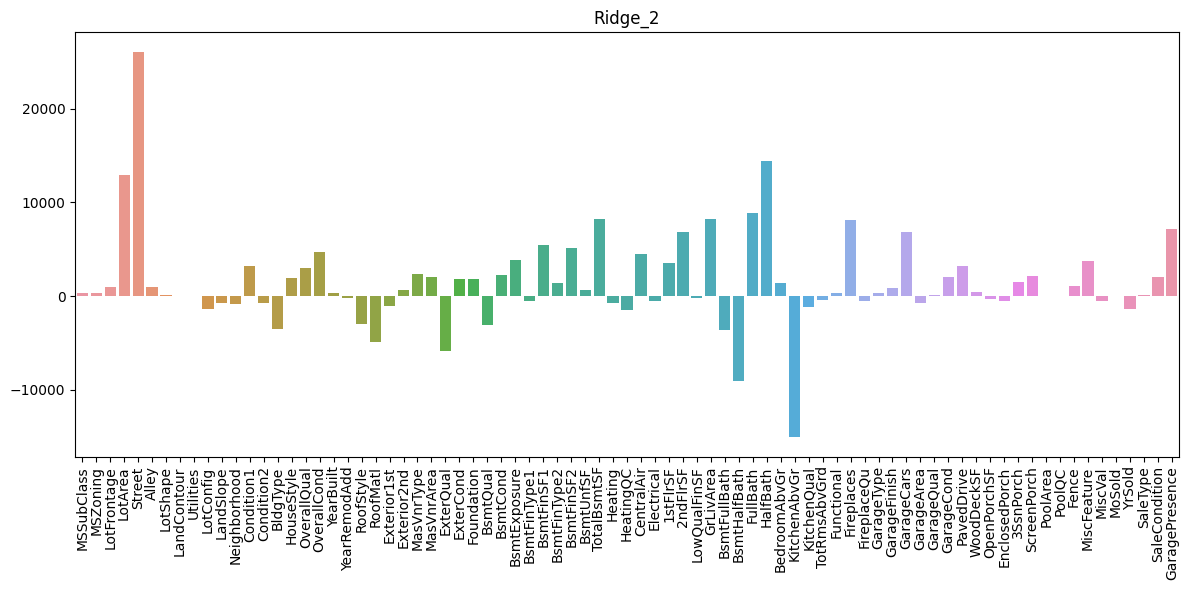

For Cluster: 3


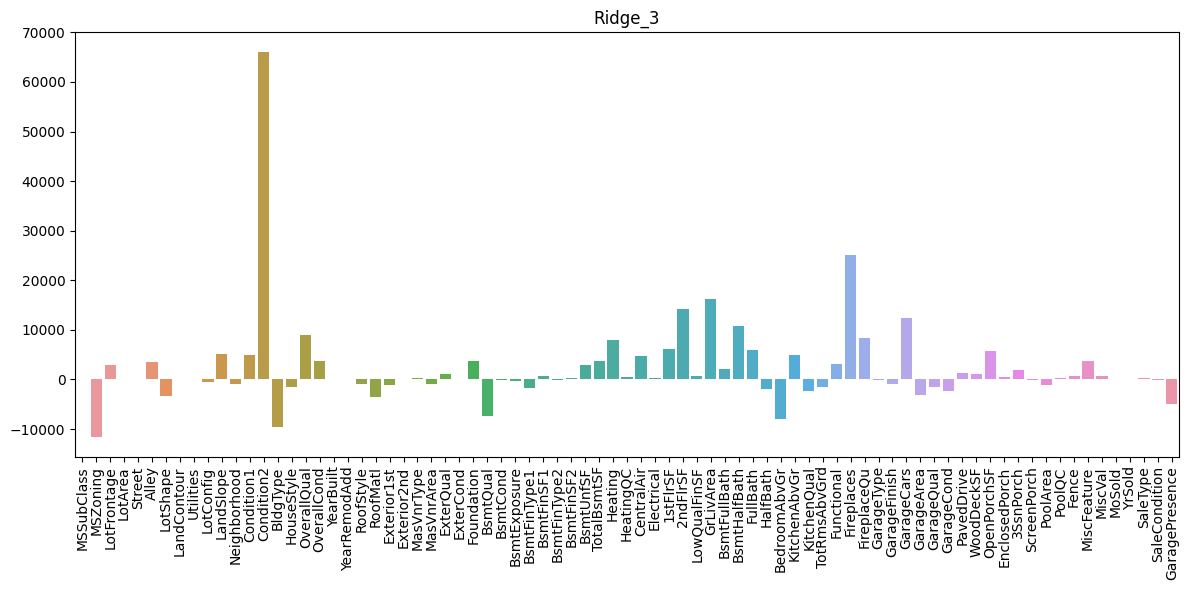

In [ ]:
# Create a Ridge Regression model with alpha=0.1 (regularization strength)
ridge_model = Ridge(alpha=0.1)

i = 0
for cluster in cluster_list:
    X_train, X_test, y_train, y_test = cluster
    print("For Cluster:", i)

    # Train the model on your training data
    ridge_model.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = ridge_model.predict(X_test)

    # Plot feature importance and save with the correct file name
    fig = plot_feature_coefficients(X_train, ridge_model,i)
    i += 1
    wandb.log({"feature_selection_plot": fig})

In [ ]:
rf_model = RandomForestRegressor()
xgb_model = XGBRegressor()
models = [rf_model,xgb_model]

In [ ]:
i = 0
for cluster in cluster_list:
  X_train, X_test, y_train, y_test = cluster
  print("For Cluster:",i)
  i += 1
  for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, predictions))
    r_squared = r2_score(y_test, predictions)

    print("Model ", i,":", model.__class__.__name__)
    print("RMSE : ", rmse)
    print("R-squared : ", r_squared)

For Cluster: 0
Model  1 : RandomForestRegressor
RMSE :  21958.045842391573
R-squared :  0.7834525850537701
Model  1 : XGBRegressor
RMSE :  21442.906997548966
R-squared :  0.7934938677204242
For Cluster: 1
Model  2 : RandomForestRegressor
RMSE :  32136.102664816626
R-squared :  0.8014262235866634
Model  2 : XGBRegressor
RMSE :  33831.12816955267
R-squared :  0.7799261486373148
For Cluster: 2
Model  3 : RandomForestRegressor
RMSE :  19982.32740911012
R-squared :  0.530756791362083
Model  3 : XGBRegressor
RMSE :  18927.82592427855
R-squared :  0.5789755463273504
For Cluster: 3
Model  4 : RandomForestRegressor
RMSE :  43524.03496051371
R-squared :  0.5898279223494252
Model  4 : XGBRegressor
RMSE :  49493.13033767206
R-squared :  0.46960717866826784


In [ ]:
def tune_models(x_train, x_test, y_train, y_test):
    # Random Forest Regressor
    rf_param_grid = {'n_estimators': [50, 100, 200, 300],
                     'max_depth': [None,2, 5, 10],
                     'min_samples_split': [2, 5, 10]}
    rf_model = RandomForestRegressor()
    rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5)
    rf_grid_search.fit(x_train, y_train)
    rf_best_model = rf_grid_search.best_estimator_

    # XGBoost Regressor
    xgb_param_grid = {'n_estimators': [50 ,100, 200, 300],
                      'max_depth': [3, 5, 7],
                      'learning_rate': [0.1, 0.01, 0.001]}
    xgb_model = XGBRegressor()
    xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5)
    xgb_grid_search.fit(x_train, y_train)
    xgb_best_model = xgb_grid_search.best_estimator_

    # Calculate RMSE for each model
    rf_predictions = rf_best_model.predict(x_test)
    rf_rmse = sqrt(mean_squared_error(y_test, rf_predictions))
    rf_rsquared = r2_score(y_test, rf_predictions)

    xgb_predictions = xgb_best_model.predict(x_test)
    xgb_rmse = sqrt(mean_squared_error(y_test, xgb_predictions))
    xgb_rsquared = r2_score(y_test, xgb_predictions)

    # Compare and return the model with the lowest RMSE
    if rf_rmse < xgb_rmse:
        best_model = rf_best_model
        best_params = rf_grid_search.best_params_
        rmse = rf_rmse
        r_squared = rf_rsquared

    else:
        best_model = xgb_best_model
        best_params = xgb_grid_search.best_params_
        rmse = xgb_rmse
        r_squared = xgb_rsquared

    return best_model, best_params, rmse , r_squared


In [ ]:
i = 0
for cluster_data in cluster_list:
    X_train, X_test, y_train, y_test = cluster_data
    print("For Cluster:", i)

    best_model, best_params, t_rmse, t_rsquared = tune_models(X_train, X_test, y_train, y_test)
    print("Best Model:", best_model.__class__.__name__)
    print("Tuned RMSE:", t_rmse)
    print("Tuned R_squared:", t_rsquared)
    print("Best Parameters:", best_params)

    wandb.config = best_params
    wandb.log({"RMSE": t_rmse, "R-Squared": t_rsquared})

    # Save the model to a file with appropriate name convention
    model_name = f'{best_model.__class__.__name__}_{i}.pkl'
    with open(os.path.join('/content/gdrive/My Drive/HousePrices/', model_name), 'wb') as file:
        pickle.dump(best_model, file)
    # Log your model as a versioned file to Weights & Biases Artifact
    artifact = wandb.Artifact(f"{best_model.__class__.__name__}_{i}", type="model")
    artifact.add_file(os.path.join('/content/gdrive/My Drive/HousePrices/', model_name))
    wandb.log_artifact(artifact)

    print("Model Saved.")
    print("-" * 40)
    i += 1


For Cluster: 0
Best Model: XGBRegressor
Tuned RMSE: 21212.163272940386
Tuned R_squared: 0.7979143147338635
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Model Saved.
----------------------------------------
For Cluster: 1
Best Model: XGBRegressor
Tuned RMSE: 30691.924851935946
Tuned R_squared: 0.8188727742802092
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Model Saved.
----------------------------------------
For Cluster: 2
Best Model: XGBRegressor
Tuned RMSE: 19899.375196062923
Tuned R_squared: 0.5346446236497653
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Model Saved.
----------------------------------------
For Cluster: 3
Best Model: RandomForestRegressor
Tuned RMSE: 43970.27934855455
Tuned R_squared: 0.5813739584093685
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Model Saved.
----------------------------------------


In [ ]:
wandb.finish()

R-Squared,▇█▁▂
RMSE,▁▄▁█
Silhouette Score,▁
R-Squared,0.58137
RMSE,43970.27935
Silhouette Score,0.4487
